In [19]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from scipy import ndimage
import tensorflow as tf
from keras import layers, models, Input 
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

In [4]:
train_dataset = h5py.File("datasets/train_signs.h5")
test_dataset = h5py.File("datasets/test_signs.h5")

In [ ]:
with h5py.File("datasets/train_signs.h5",'r') as f:
    def print_structure(name, obj):
        print(f"{name}: {obj}")
    f.visititems(print_structure)

list_classes: <HDF5 dataset "list_classes": shape (6,), type "<i8">
train_set_x: <HDF5 dataset "train_set_x": shape (1080, 64, 64, 3), type "|u1">
train_set_y: <HDF5 dataset "train_set_y": shape (1080,), type "<i8">


5


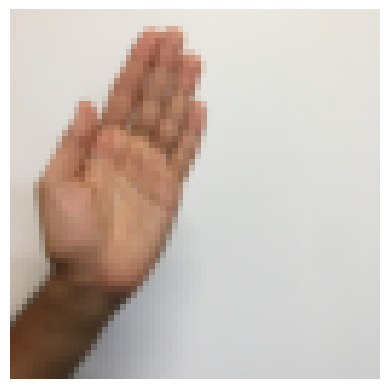

In [35]:
with h5py.File("datasets/train_signs.h5", 'r') as f:
    X_train = f["train_set_x"][:]
    Y_train = f["train_set_y"][:]
    image1 = X_train[0]
    label1 = Y_train[0]
    image2 = X_train[1]
    label2 = Y_train[1] 
    image = []
    for i in range(30):
        if Y_train[i]==5:
            image.append(X_train[i])
plt.imshow(image[3])
print(label1)
plt.axis('off')
plt.show()

0


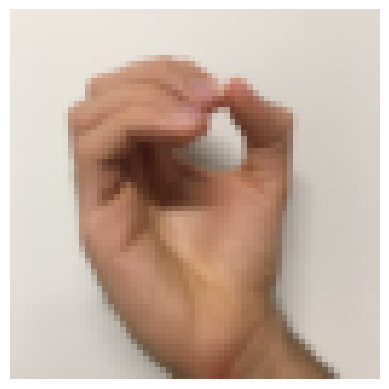

In [9]:
plt.imshow(image2)
print(label2)
plt.axis('off')
plt.show()

In [25]:
X_train = np.array(train_dataset["train_set_x"][:])
Y_train = np.array(train_dataset["train_set_y"][:])
X_test = np.array(test_dataset["test_set_x"][:])
Y_test = np.array(test_dataset["test_set_y"][:])

X_train = X_train/255
X_test = X_test/255

Y_train = to_categorical(Y_train, num_classes=6) 
Y_test = to_categorical(Y_test, num_classes=6)
# need to one hot encode even categorical data as softmax func gives probability which is then compared to the one hot encoded values

In [21]:
model = models.Sequential()
model.add(Input(shape=(64,64,3)))
model.add(layers.Conv2D(8,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(6, activation='softmax'))

In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=20, batch_size=64)
loss, auc = model.evaluate(X_test, Y_test)
print(f"Accuracy: {auc*100:.2f}%")

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9703 - loss: 0.0812
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 1.0000 - loss: 0.0130
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 1.0000 - loss: 0.0055
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 1.0000 - loss: 0.0046
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 1.0000 - loss: 0.0037
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 1.0000 - loss: 0.0034
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 1.0000 - loss: 0.0030
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 1.0000 - loss: 0.0031
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 0.0028
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0028
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0029
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy:

In [31]:
model.save("HandDigitRecognizer.keras")